Comparaison visuelle

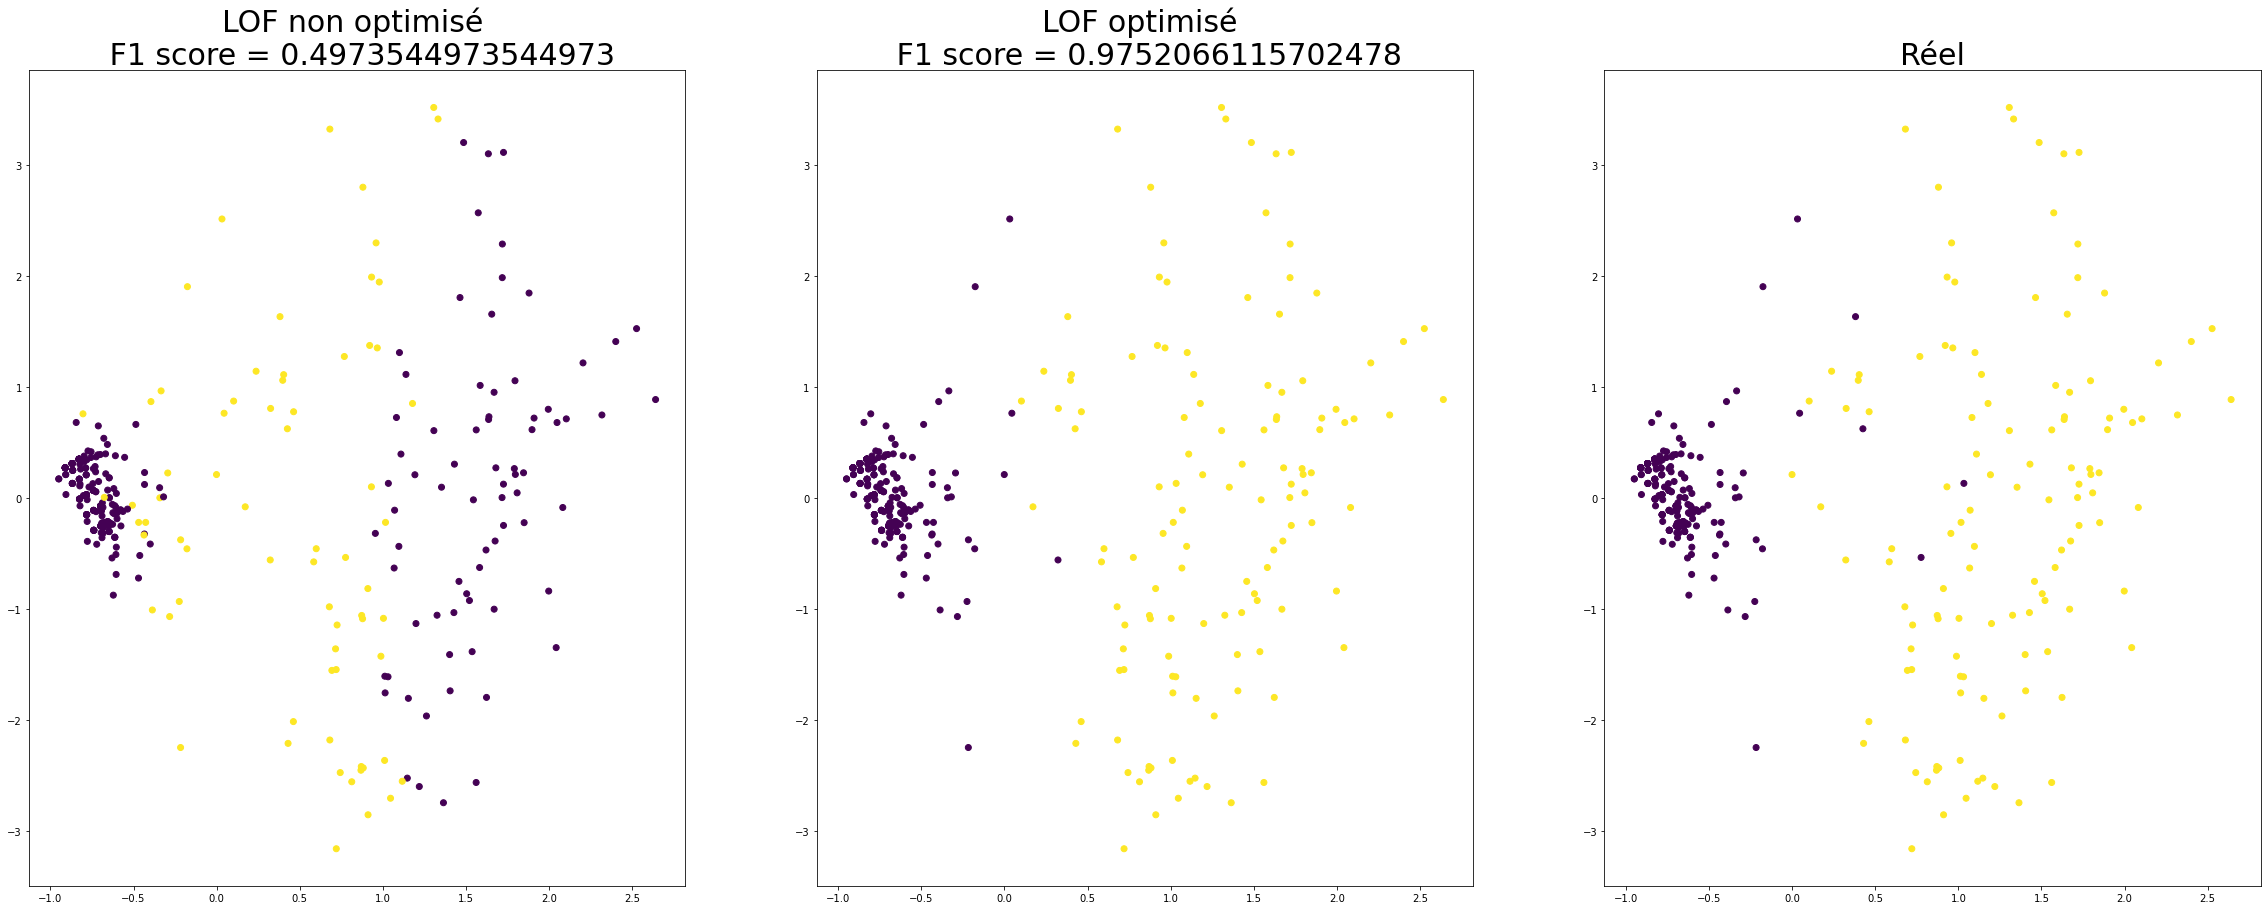

In [3]:
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, balanced_accuracy_score

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

model=PCA(n_components=2)
X_2D=X_test
X_2D=model.fit_transform(X_2D)
X_2D=StandardScaler().fit_transform(X_2D)

LOF1 = LocalOutlierFactor(n_neighbors=120, algorithm='auto', contamination=0.2, metric='euclidean')
y_pred_LOF1 = LOF1.fit_predict(X_test)
y_pred_LOF1[y_pred_LOF1>0]=0
y_pred_LOF1[y_pred_LOF1<0]=1
result_LOF1 = f1_score(y_test,y_pred_LOF1)

LOF2 = LocalOutlierFactor(n_neighbors=round(len(X_test)*0.6), algorithm='auto', contamination=0.357, metric='manhattan')
y_pred_LOF2 = LOF2.fit_predict(X_test)
y_pred_LOF2[y_pred_LOF2>0]=0
y_pred_LOF2[y_pred_LOF2<0]=1
result_LOF2 = f1_score(y_test,y_pred_LOF2)

plt.figure(figsize = (40, 15))
plt.subplot(1,3,1)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_LOF1)
plt.title("LOF non optimisé \n F1 score = {}".format(result_LOF1), size=30)
plt.subplot(1,3,2)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_LOF2)
plt.title("LOF optimisé \n F1 score = {}".format(result_LOF2), size=30)
plt.subplot(1,3,3)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_test)
plt.title("Réel",size=30)
plt.show()

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

matrice=np.array([])

skf= StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*0.6), algorithm='auto', contamination=0.357, metric="manhattan")
    y_pred=LOF.fit_predict(X_test)
    y_pred[y_pred>0]=0
    y_pred[y_pred<0]=1
    F1=round(f1_score(y_test,y_pred),3)
    matrice=np.append(matrice,F1)
matrice=matrice.reshape(1,10)
df=pd.DataFrame(matrice,index=["[LOF]"])
display(df)

moyenne=np.mean(matrice)
ecart_type=np.std(matrice)
print("Moyenne LOF : {}".format(moyenne))
print("Ecart type LOF : {}".format(round(ecart_type,3)))

,0,1,2,3,4,5,6,7,8,9
[LOF],0.939,0.98,0.939,0.894,0.958,0.958,0.958,1.0,0.958,1.0


Moyenne LOF : 0.9583999999999999
Ecart type LOF : 0.03


Comparaison algo non opti

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

matrice_LOF=np.array([])
matrice_iso=np.array([])
matrice_kmeans=np.array([])

skf= StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    
    LOF = LocalOutlierFactor(n_neighbors=20, contamination='auto', metric='minkowski')
    y_pred_LOF=LOF.fit_predict(X_test)
    y_pred_LOF[y_pred_LOF>0]=0
    y_pred_LOF[y_pred_LOF<0]=1
    
    model = IsolationForest(contamination='auto', n_estimators=100, max_samples='auto',max_features=1)
    model.fit(X_train)
    y_pred_iso=model.predict(X_test)
    y_pred_iso[y_pred_iso>0]=0
    y_pred_iso[y_pred_iso<0]=1
    
    kmeans = KMeans(n_clusters=2, init="k-means++", n_init=10).fit(X_test)
    y_pred_kmeans=kmeans.labels_
    
    F1_LOF=round(f1_score(y_test,y_pred_LOF),3)
    F1_iso=round(f1_score(y_test,y_pred_iso),3)
    F1_kmeans=round(f1_score(y_test,y_pred_kmeans),3)
    
    if F1_kmeans < 0.1 :
        F1_kmeans=1-F1_kmeans
        
    matrice_LOF = np.append(matrice_LOF, F1_LOF)
    matrice_iso = np.append(matrice_iso, F1_iso)
    matrice_kmeans = np.append(matrice_kmeans, F1_kmeans)   

matrice_LOF=matrice_LOF.reshape(1,10)
matrice_iso=matrice_iso.reshape(1,10)
matrice_kmeans=matrice_kmeans.reshape(1,10)

matrice_kmeans=np.array([[0.917, 0.800, 0.960, 0.942, 1.000, 0.958, 0.943, 0.979, 0.971, 1.000]])

df_LOF=pd.DataFrame(matrice_LOF,index=["[LOF]"])
df_iso=pd.DataFrame(matrice_iso,index=["[Isolation Forest]"])
df_kmeans=pd.DataFrame(matrice_kmeans,index=["[Kmeans]"])
Comparaison=pd.concat([df_LOF, df_iso, df_kmeans], axis = 0)
display(df_kmeans)

moyenne=Comparaison.mean(axis=1)
ecart_type=Comparaison.std(axis=1)

print(moyenne)
print(ecart_type)



,0,1,2,3,4,5,6,7,8,9
[Kmeans],0.917,0.8,0.96,0.942,1.0,0.958,0.943,0.979,0.971,1.0


[LOF]                 0.3059
[Isolation Forest]    0.9313
[Kmeans]              0.9470
dtype: float64
[LOF]                 0.151007
[Isolation Forest]    0.042599
[Kmeans]              0.057791
dtype: float64


Construction du dataset de l'ensemble des combinaisons possibles

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, balanced_accuracy_score

dataset = sp.loadmat('breastw.mat') # On importe le dataset 

X = dataset['X'] # On récupère les caractéristiques des points du data
y = dataset['y'] # On récupère les labels des points du dataset
y=np.reshape(y,(683,)) # On redimensionne les labels des points du dataset

calcul_distances=['euclidean','cityblock', 'cosine', 'l1', 'l2', 'manhattan'] # On définit les différences facons de calculer une distance entre deux points

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None) # On définit notre méthode perettant de couper notre dataset en plusieurs parties
i=0 # On définit la variable i
for train_index, test_index in skf.split(X, y): 
    test =False # On définit la vraible test qui servira pour la contruction de la matrice recueillant les métriques d'analyses
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for k in np.linspace(0.3,1,50) : # On fait varier notre nombre de voisins pris en faisant varier un pourcentage
        for distance in calcul_distances : # On fait varier nos différentes méthodes de calcul de distance
            for contam in np.linspace(0.001,0.5,50) : # On fait varier la contamination
                LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*k), algorithm='auto', contamination=contam, metric=distance)
                y_pred = LOF.fit_predict(X_test)
                X_scores = -LOF.negative_outlier_factor_
                # On modifie notre y_pred afin de pouvoir le comparer avec le y_test
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3) # On calcul le F1 score
                recall=round(recall_score(y_test,y_pred),3) # On calcul le recall
                precision=round(precision_score(y_test,y_pred,zero_division=0),3) # On calcul la precision
                accuracy=round(accuracy_score(y_test,y_pred),3) # On calcul l'accuracy
                auc=round(roc_auc_score(y_test,X_scores),3) # On calcul l'AUC
                bal_accuracy=round(balanced_accuracy_score(y_test,y_pred),3) # On calcul le balanced accuracy
                if test == False : # Si la matrice n'a pas encore été crée alors on la crée
                    matrice = np.array([['[{},{},{}]'.format(round(k,3),distance,round(contam,3)),F1,recall,precision,accuracy,auc,bal_accuracy]])
                    test = True 
                else : # Si la matrice a été crée alors y rajoute des lignes
                    matrice = np.append(matrice,np.array(['[{},{},{}]'.format(round(k,3),distance,round(contam,3)),F1,recall,precision,accuracy,auc,bal_accuracy]).reshape(1,7),axis=0)
    if i == 0 : 
        df1=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC','Balanced accuracy'])
    else :
        df2=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC','Balanced accuracy'])
    i=i+1    
df1 = df1.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
df2 = df2.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
print(np.var(df1['F1 score']))

filtered_values_1 = np.where((df1['F1 score']>=0.93) & (df1['Recall']>=0.925) & (df1['Precision']>=0.925) & (df1['AUC']>=0.925))
filtered_values_2 = np.where((df2['F1 score']>=0.97) & (df2['Recall']>=0.97) & (df2['Precision']>=0.965) & (df2['AUC']>=0.965))
display(df1.loc[filtered_values_1].sort_values(by=['AUC'], ascending=False))
display(df2.loc[filtered_values_2].sort_values(by=['AUC'], ascending=False))


0.07223730678719542


,Combinaison,F1 score,Recall,Precision,Accuracy,AUC,Balanced accuracy
6585,"[0.6,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6485,"[0.6,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
7185,"[0.629,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
7085,"[0.629,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6985,"[0.629,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6385,"[0.6,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6285,"[0.586,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6185,"[0.586,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6085,"[0.586,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
5985,"[0.571,manhattan,0.357]",0.934,0.942,0.926,0.953,0.991,0.951


,Combinaison,F1 score,Recall,Precision,Accuracy,AUC,Balanced accuracy
6634,"[0.614,euclidean,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
6834,"[0.614,l2,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
7234,"[0.643,euclidean,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
7434,"[0.643,l2,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
6334,"[0.6,euclidean,0.347]",0.975,0.975,0.975,0.982,0.997,0.981
6534,"[0.6,l2,0.347]",0.975,0.975,0.975,0.982,0.997,0.981
6934,"[0.629,euclidean,0.347]",0.975,0.975,0.975,0.982,0.996,0.981
7134,"[0.629,l2,0.347]",0.975,0.975,0.975,0.982,0.996,0.981
6034,"[0.586,euclidean,0.347]",0.975,0.975,0.975,0.982,0.995,0.981
6234,"[0.586,l2,0.347]",0.975,0.975,0.975,0.982,0.995,0.981


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, balanced_accuracy_score

dataset = sp.loadmat('breastw.mat') # On importe le dataset 

X = dataset['X'] # On récupère les caractéristiques des points du data
y = dataset['y'] # On récupère les labels des points du dataset
y=np.reshape(y,(683,)) # On redimensionne les labels des points du dataset

algos=['lloyd', 'elkan', 'auto', 'full'] # On définit les différences facons de calculer une distance entre deux points
inits=['k-means++', 'random']

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None) # On définit notre méthode perettant de couper notre dataset en plusieurs parties
i=0 # On définit la variable i
for train_index, test_index in skf.split(X, y): 
    test =False # On définit la vraible test qui servira pour la contruction de la matrice recueillant les métriques d'analyses
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for nb_init in range(1,50,5) : # On fait varier notre nombre de voisins pris en faisant varier un pourcentage
        for maxit in range(100,500,20) : # On fait varier nos différentes méthodes de calcul de distance
            for contam in np.linspace(0.001,0.5,20) : # On fait varier la contamination
                for nb_estim in range(1,200,10) :
                    kmeans = KMeans(n_clusters=2, init=inits ,n_init=nb_init ,max_iter= ,algorithm=).fit(X_test)
                    y_pred_kmeans=kmeans.labels_
                    y_pred[y_pred>0]=0
                    y_pred[y_pred<0]=1
                    # On modifie notre y_pred afin de pouvoir le comparer avec le y_test
                    F1=round(f1_score(y_test,y_pred),3) # On calcul le F1 score
                    if test == False : # Si la matrice n'a pas encore été crée alors on la crée
                        matrice = np.array([['[{},{},{},{}]'.format(round(maxfeat,3),maxsamp,round(contam,3),nb_estim),F1]])
                        test = True 
                    else : # Si la matrice a été crée alors y rajoute des lignes
                        matrice = np.append(matrice,np.array(['[{},{},{},{}]'.format(round(maxfeat,3),maxsamp,round(contam,3),nb_estim),F1]).reshape(1,2),axis=0)
    if i == 0 : 
        df1=pd.DataFrame(matrice,columns=['Combinaison','F1 score'])
    else :
        df2=pd.DataFrame(matrice,columns=['Combinaison','F1 score'])
    i=i+1    

filtered_values_1 = np.where((df1['F1 score']>=0.9))
display(df1.loc[filtered_values_1])


c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\Users\julie\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:451: RuntimeWarning: invalid value encountered in true_divide
  

KeyboardInterrupt: 

Construction dataset de comparaison des différentes combinaisons choisies

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']
y=np.reshape(y,(683,))

K=np.array([0.5,0.514,0.543,0.571,0.6,0.629,0.12,0.25])
Distance=np.array(['cityblock','manhattan','l1','euclidean','manhattan','euclidean','l2','l2'])
Contamination=np.array([0.357,0.357,0.357,0.357,0.357,0.347,0.22,0.43])

skf= StratifiedKFold(n_splits=12,shuffle=False,random_state=None)


for i in range(0,8) :  
    test=False
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*K[i]), algorithm='auto', contamination=Contamination[i], metric=Distance[i])
        y_pred = LOF.fit_predict(X_test)
        X_scores = -LOF.negative_outlier_factor_
        y_pred[y_pred>0]=0
        y_pred[y_pred<0]=1
        F1=round(f1_score(y_test,y_pred),3)
        if test == False :
            matrice = np.array([[F1]])
            test = True
        else :
            matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
    if i == 0  :
        df=pd.DataFrame(matrice,columns=['[{},{},{}]'.format(K[i],Distance[i],round(Contamination[i],3))])
    else :
        df1=pd.DataFrame(matrice,columns=['[{},{},{}]'.format(K[i],Distance[i],round(Contamination[i],3))])
        df=pd.concat([df, df1], axis = 1)
display(df)

        

,"[0.5,cityblock,0.357]","[0.514,manhattan,0.357]","[0.543,l1,0.357]","[0.571,euclidean,0.357]","[0.6,manhattan,0.357]","[0.629,euclidean,0.347]","[0.12,l2,0.22]","[0.25,l2,0.43]"
0,0.900,0.900,0.900,0.850,0.900,0.850,0.364,0.578
1,1.000,1.000,1.000,0.950,1.000,0.950,0.364,0.667
2,0.950,0.950,0.950,0.900,0.900,0.900,0.364,0.711
3,0.850,0.850,0.900,0.900,0.900,0.900,0.125,0.222
4,0.850,0.850,0.850,0.950,0.950,0.950,0.000,0.222
5,1.000,1.000,1.000,1.000,1.000,1.000,0.061,0.444
6,0.950,0.950,0.950,0.950,0.950,0.950,0.182,0.711
7,0.950,0.950,0.950,0.950,0.950,0.950,0.250,0.400
8,1.000,1.000,1.000,1.000,1.000,1.000,0.061,0.273
9,0.950,0.950,0.950,0.950,0.950,0.950,0.242,0.400


In [8]:
from scipy import stats
from scipy.stats import f_oneway

t1,p1=stats.kruskal(df['[0.6,manhattan,0.357]'], df['[0.514,manhattan,0.357]'])
t2,p2=stats.kruskal(df['[0.6,manhattan,0.357]'], df['[0.25,l2,0.43]'])

print("p-value = {}".format(round(p1,3)))
print("p-value = {}".format(round(p2,3)))

p-value = 0.869
p-value = 0.001


Construction dataset comparaison des modèles

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']


skf= StratifiedKFold(n_splits=10,shuffle=False,random_state=None)
 
test=False
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*0.6), algorithm='auto', contamination=0.357, metric="manhattan")
    y_pred_LOF = LOF.fit_predict(X_test)
    y_pred_LOF[y_pred_LOF>0]=0
    y_pred_LOF[y_pred_LOF<0]=1
    
    model = IsolationForest(contamination=0.35, n_estimators=80, max_samples=20,max_features=5)
    model.fit(X_train)
    y_pred_iso=model.predict(X_test)
    y_pred_iso[y_pred_iso>0]=0
    y_pred_iso[y_pred_iso<0]=1
    
    kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
    y_pred_kmeans=kmeans.labels_
    
    F1_LOF=round(f1_score(y_test,y_pred_LOF),3)
    F1_iso=round(f1_score(y_test,y_pred_iso),3)
    F1_kmeans=round(f1_score(y_test,y_pred_kmeans),3)
    
    if F1_kmeans < 0.1 :
        F1_kmeans=1-F1_kmeans
    if test == False :
        matrice_LOF = np.array([[F1_LOF]])
        matrice_iso = np.array([[F1_iso]])
        matrice_kmeans = np.array([[F1_kmeans]])
        test = True
    else :
        matrice_LOF = np.append(matrice_LOF,np.array([F1_LOF]).reshape(1,1),axis=0)
        matrice_iso = np.append(matrice_iso,np.array([F1_iso]).reshape(1,1),axis=0)
        matrice_kmeans = np.append(matrice_kmeans,np.array([F1_kmeans]).reshape(1,1),axis=0)

df_LOF=pd.DataFrame(matrice_LOF,columns=["LOF"])
df_iso=pd.DataFrame(matrice_iso,columns=["Isolation Forest"])
df_kmeans=pd.DataFrame(matrice_kmeans,columns=["Kmeans"])
Comparaison=pd.concat([df_LOF, df_iso, df_kmeans], axis = 1)
display(Comparaison)

,LOF,Isolation Forest,Kmeans
0,0.939,0.889,0.942
1,0.980,0.923,0.800
2,0.939,0.906,0.960
3,0.894,0.902,0.933
4,0.958,0.906,1.000
5,0.958,0.960,0.958
6,0.958,0.941,0.957
7,1.000,0.960,0.979
8,0.958,0.958,0.979
9,1.000,0.980,1.000


In [8]:
print(Comparaison["LOF"].mean())
print(Comparaison["Isolation Forest"].mean())
print(Comparaison["Kmeans"].mean())

0.9583999999999999
0.9324999999999999
0.9507999999999999


In [15]:
from scipy import stats
import scikit_posthocs as sph
from scipy.stats import f_oneway, wilcoxon 


t,p=stats.kruskal(Comparaison['LOF'], Comparaison['Isolation Forest'],Comparaison['Kmeans'])

#print("p-value = {}".format(round(p,3)))

sph.posthoc_conover([Comparaison['LOF'],Comparaison['Isolation Forest'],Comparaison['Kmeans']])

t1,p1= wilcoxon(Comparaison['LOF'],Comparaison['Isolation Forest'],alternative="greater")
t2,p2= wilcoxon(Comparaison['Kmeans'],Comparaison['Isolation Forest'],alternative="greater")
t3,p3= wilcoxon(Comparaison['LOF'],Comparaison['Kmeans'],alternative="greater")
print("p-value = {}".format(round(p1,3)))
print("p-value = {}".format(round(p2,3)))
print("p-value = {}".format(round(p3,3)))



p-value = 0.01
p-value = 0.053
p-value = 0.759
